# Assignment on Python Libraries
*   The dataset for this assignment is provided in the same folder as the assignment.
*   Try to write optimal code for each section and explain your understanding wherever required.
*  Required Libraries are imported wherever needed.
*   It's suggested to do it after studying all topics to reinforce your learning. Just a reminder, this assignment can be done in 10min using A.I, which will increase your skill of chatting with chatgpt (**but nothing else**), so try to approach with a bit more purpose.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Read the csv and store it in a dataframe named mobile_usage
*  Identify the null values in the dataframe and print the count of null values in each column

In [11]:
file = pd.read_csv('mobile_usage_behavioral_analysis.csv')
mobile_usage = pd.DataFrame(file)
mobile_usage.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Total_App_Usage_Hours,0
Daily_Screen_Time_Hours,0
Number_of_Apps_Used,0
Social_Media_Usage_Hours,0
Productivity_App_Usage_Hours,0
Gaming_App_Usage_Hours,0
Location,0


#Identify Different dtypes of the columns

In [12]:
mobile_usage.dtypes

,0
User_ID,int64
Age,int64
Gender,object
Total_App_Usage_Hours,float64
Daily_Screen_Time_Hours,float64
Number_of_Apps_Used,int64
Social_Media_Usage_Hours,float64
Productivity_App_Usage_Hours,float64
Gaming_App_Usage_Hours,float64
Location,object


#Get the count of number of people of each age  in the dataset and store it in a 2-d numpy array with first element in row being age and second element number of people with that age.

In [18]:

age_counts = mobile_usage['Age'].value_counts().reset_index()
age_counts_array = age_counts.to_numpy()
age_counts_array

array([[50, 37],
       [43, 34],
       [52, 32],
       [54, 31],
       [45, 30],
       [22, 29],
       [56, 28],
       [41, 27],
       [18, 27],
       [19, 27],
       [42, 27],
       [25, 27],
       [49, 26],
       [53, 25],
       [20, 25],
       [23, 25],
       [40, 25],
       [39, 24],
       [47, 24],
       [34, 24],
       [31, 24],
       [28, 23],
       [29, 23],
       [46, 23],
       [57, 23],
       [32, 22],
       [36, 21],
       [33, 21],
       [21, 21],
       [26, 21],
       [38, 20],
       [55, 20],
       [27, 20],
       [30, 20],
       [59, 19],
       [37, 19],
       [51, 19],
       [58, 19],
       [44, 18],
       [48, 18],
       [35, 17],
       [24, 15]])

#Calculate the average usage_time for different age groups and identify the age group with the highest total usage_time (screen time).
#Plot graphs of average usage_time versus age:
* Scatter plot
* Bar graph

Age group with the highest total usage time: 43


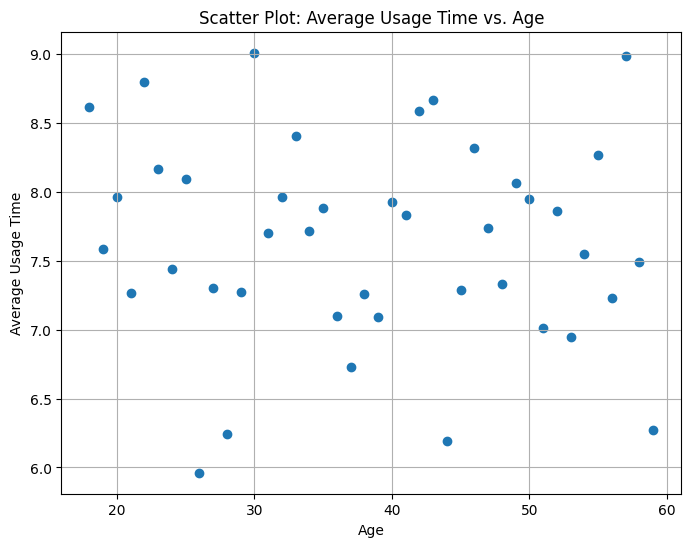

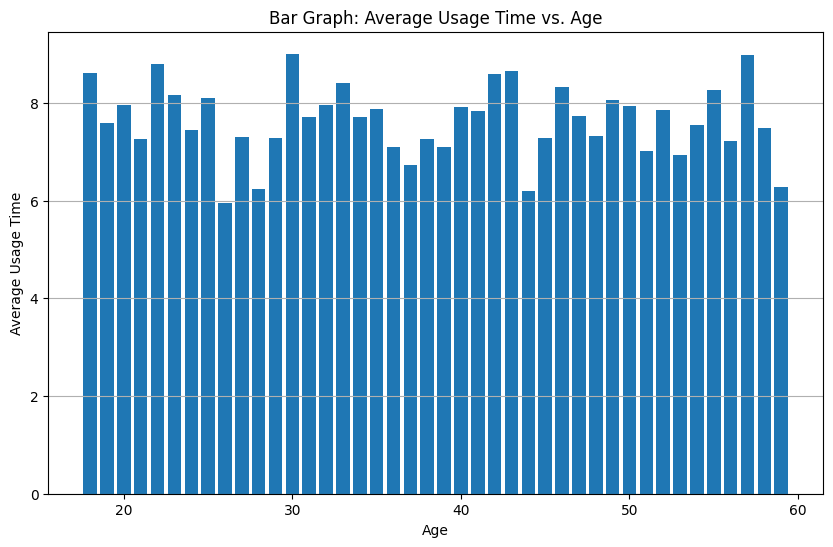

In [21]:

average_usage_by_age = mobile_usage.groupby('Age')['Daily_Screen_Time_Hours'].mean()
total_usage_by_age = mobile_usage.groupby('Age')['Daily_Screen_Time_Hours'].sum()
age_group_highest_usage = total_usage_by_age.idxmax()

print(f"Age group with the highest total usage time: {age_group_highest_usage}")


plt.figure(figsize=(8, 6))
plt.scatter(average_usage_by_age.index, average_usage_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Usage Time')
plt.title('Scatter Plot: Average Usage Time vs. Age')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(average_usage_by_age.index, average_usage_by_age.values)
plt.xlabel('Age')
plt.ylabel('Average Usage Time')
plt.title('Bar Graph: Average Usage Time vs. Age')
plt.grid(axis='y')
plt.show()

#Sort the DataFrame by age using both Pandas and NumPy.
* Remove the data of individuals above 45 years of age and  store the modified DataFrame in a new variable new_df.

In [24]:

new_df = mobile_usage[mobile_usage['Age'] <= 45].reset_index()
new_df

,index,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
1,3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
2,4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
3,6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles
4,7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
...,...,...,...,...,...,...,...,...,...,...,...
651,992,993,30,Female,8.04,12.51,10,3.00,4.34,0.96,New York
652,995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles
653,996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles
654,998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix


### Add a New Column **location_type**
*  Create a new column named location_type in the original DataFrame (mobile_usage).
*  Assign integer labels to locations based on their frequency (in descending order):
 *  The most frequent location should be labeled as 0.
 *  The second most frequent location should be labeled as 1, and so on.
 *  Less frequent locations will have higher integer values.
*  Ensure that the labels are assigned based strictly on the frequency ranking of the locations.

In [25]:
location_counts = mobile_usage['Location'].value_counts()
location_mapping = {location: i for i, location in enumerate(location_counts.index)}
mobile_usage['location_type'] = mobile_usage['Location'].map(location_mapping)
mobile_usage

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,location_type
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,3
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,2
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,4
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,1
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,0
...,...,...,...,...,...,...,...,...,...,...,...
995,996,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,3
996,997,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,3
997,998,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,1
998,999,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix,1


### Normalisation
 Normalization is a process used to adjust the scale or range of data values, making them consistent and comparable across different features or datasets. It ensures that all features contribute equally to a model or analysis, especially when they have vastly different scales.

 Just understand the definition for now , in the upcoming weeks this topic will be discussed in detail.

*  Normalize the gaming app usage hours using min-max scaling (https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)) and store it in some numpy array .
*  Verify whether the normalisation correct or not by plotting histograms with same name number of bins(Why?Is it correct?) .
*  (Optional) Write a function which takes argument a dataframe and returns a dataframe which have all columns in its **Normalized** by min - max scaling


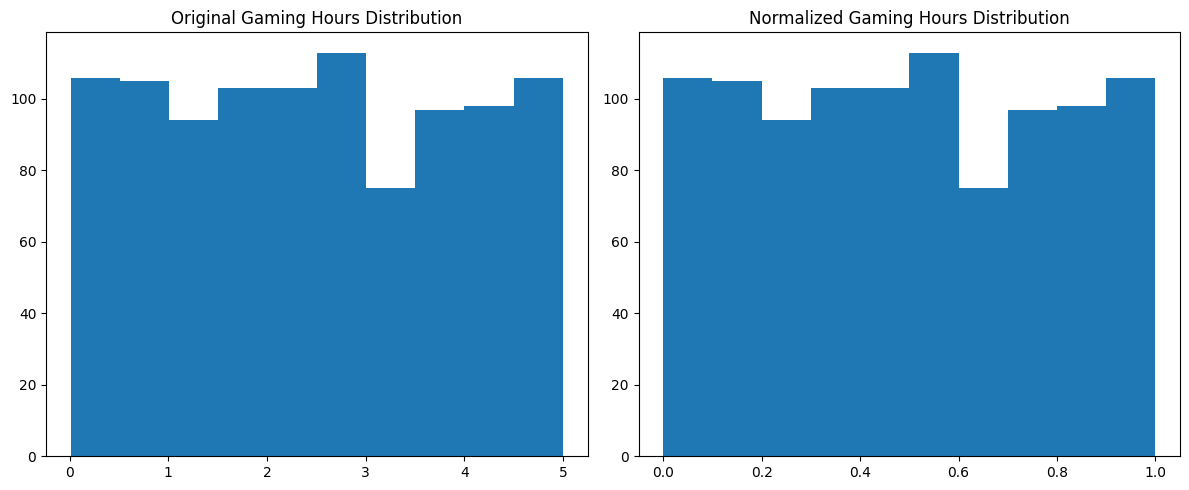

In [27]:

gaming_hours = mobile_usage['Gaming_App_Usage_Hours'].values
normalized_gaming_hours = (gaming_hours - gaming_hours.min()) / (gaming_hours.max() - gaming_hours.min())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(gaming_hours, bins=10)
plt.title('Original Gaming Hours Distribution')

plt.subplot(1, 2, 2)
plt.hist(normalized_gaming_hours, bins=10)
plt.title('Normalized Gaming Hours Distribution')

plt.tight_layout()
plt.show()

# Optional
def normalize_dataframe(df):

    normalized_df = df.copy()
    for column in df.select_dtypes(include=np.number):
        min_val = df[column].min()
        max_val = df[column].max()
        normalized_df[column] = (df[column] - min_val) / (max_val - min_val)
    return normalized_df

### Plot the relationship between Number_of_apps_used and Daily_Screen_Time_Hours using different types of plots (e.g., scatter plot, line plot, bar graph, etc.).
* Analyze the plots and explain which type of plot best illustrates the relationship between these two variables

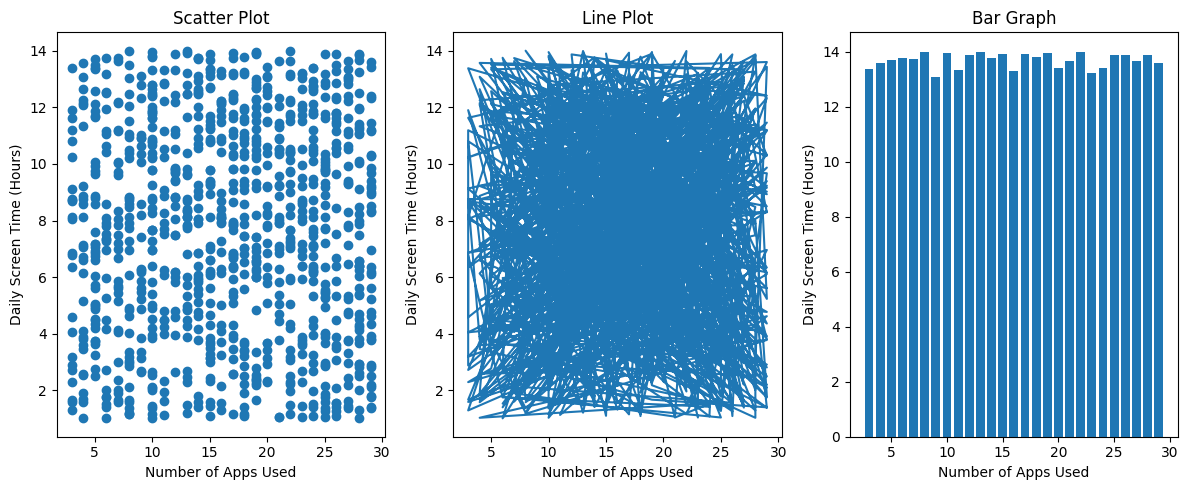

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(mobile_usage['Number_of_Apps_Used'], mobile_usage['Daily_Screen_Time_Hours'])
plt.xlabel('Number of Apps Used')
plt.ylabel('Daily Screen Time (Hours)')
plt.title('Scatter Plot')

plt.subplot(1, 3, 2)
plt.plot(mobile_usage['Number_of_Apps_Used'], mobile_usage['Daily_Screen_Time_Hours'])
plt.xlabel('Number of Apps Used')
plt.ylabel('Daily Screen Time (Hours)')
plt.title('Line Plot')

plt.subplot(1, 3, 3)
plt.bar(mobile_usage['Number_of_Apps_Used'], mobile_usage['Daily_Screen_Time_Hours'])
plt.xlabel('Number of Apps Used')
plt.ylabel('Daily Screen Time (Hours)')
plt.title('Bar Graph')

plt.tight_layout()
plt.show()

bar graph

# Broadcasting

*  Use multiple columns from a DataFrame to represent points in an n-dimensional space (take atleast 3 columns).
*  Calculate the Euclidean distance between all pairs of points using:
* A loop-based approach (without broadcasting).
* A vectorized approach using broadcasting.
* Compare the results and performance of both methods.


### To compare the performances use the time module

 A sample code is given below .


In [ ]:
# import time

# # Timing the loop-based approach
# start_time = time.time()
# # (Loop-based distance calculation code here)
# end_time = time.time()
# print(f"Loop-based method took {end_time - start_time:.6f} seconds")

# # Timing the broadcasting approach
# start_time = time.time()
# # (Broadcasting-based distance calculation code here)
# end_time = time.time()
# print(f"Broadcasting method took {end_time - start_time:.6f} seconds")


In [31]:
import time

points = mobile_usage[['Daily_Screen_Time_Hours', 'Number_of_Apps_Used', 'Age']].values

# Loop-based approach
start_time = time.time()
distances_loop = np.zeros((len(points), len(points)))
for i in range(len(points)):
    for j in range(len(points)):
        distances_loop[i, j] = np.linalg.norm(points[i] - points[j])
end_time = time.time()
print(f"Loop-based method took {end_time - start_time:.6f} seconds")

# Broadcasting approach
start_time = time.time()
diffs = points[:, np.newaxis, :] - points[np.newaxis, :, :]
distances_broadcast = np.linalg.norm(diffs, axis=2)
end_time = time.time()
print(f"Broadcasting method took {end_time - start_time:.6f} seconds")



Loop-based method took 5.008287 seconds
Broadcasting method took 0.068596 seconds
